## Purpose
Provide support for Data Camp module and answer questions, go over Dunford’s data wrangling practice, data visualization in seaborn or matplotlib to complement Johnson’s plotnine lectures

## Notes:
Second problem set will have some data viz, Johnson prefers ggplot/plotnine 

## Resources

Data wrangling: http://ericdunford.com/ppol564/lectures/week_06/week-06-async-material.html

Data viz: http://ericdunford.com/ppol564/lectures/week_07/week-07-async-material.html

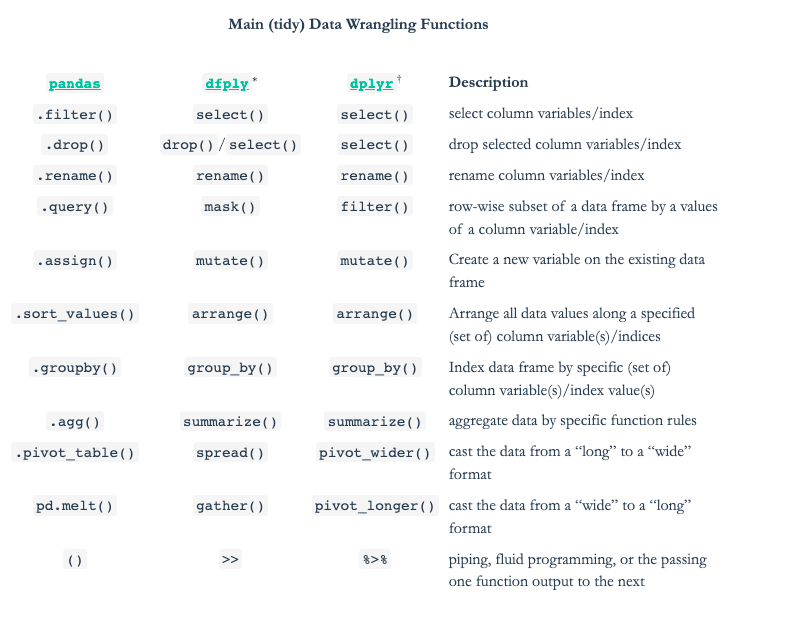

In [1]:
import pandas as pd
import numpy as np 

# Read in data 
# gapminder = pd.read_csv("gapminder.csv")
from gapminder import gapminder

In [2]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
gapminder.shape

(1704, 6)

In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Data Cleaning/Interpretation

#### 1. How many countries & continents are in the data?

In [5]:
## Built-in function 
gapminder[['country','continent']].nunique()

country      142
continent      5
dtype: int64

In [6]:
## Column-wise apply to find unique
gapminder[['country','continent']].apply(lambda x: len(x.unique()), axis = 0)

country      142
continent      5
dtype: int64

In [7]:
## Built-in function, then attribute of result
print(gapminder['country'].drop_duplicates().size)

print(gapminder['continent'].drop_duplicates().size)

print(gapminder[['country','continent']].drop_duplicates().size)


142
5
284


#### 4. From a (simulated) imperfect data set, which countries are missing years of data?

In [8]:
## Randomly drop 200 observations from Gapminder
import numpy as np
np.random.seed(564)

remove_n = 200
drop_indices = np.random.choice(gapminder.index, remove_n, replace=False)
gm_subset = gapminder.drop(drop_indices)

print(f"Gapminder data set is originally {gapminder.shape[0]} observations.")
print(f"Gapminder data subset is now {gm_subset.shape[0]} observations.")

Gapminder data set is originally 1704 observations.
Gapminder data subset is now 1504 observations.


In [9]:
gm_subset.groupby(['country'])\
    .agg({'year':'nunique'})\
    .reset_index()\
    .sort_values(by = 'year', ascending = True)\
    .head(10)

,country,year
118,Spain,7
65,Jamaica,8
130,Tunisia,8
128,Togo,8
0,Afghanistan,9
66,Japan,9
100,Peru,9
35,Djibouti,9
64,Italy,9
62,Ireland,9


#### Which year is missing the most amount of data?

In [10]:
gm_subset[['year']].value_counts().sort_index()

year
1952    116
1957    124
1962    129
1967    126
1972    130
1977    125
1982    132
1987    121
1992    127
1997    120
2002    126
2007    128
dtype: int64

#### 3. Which country has the lowest average population in the data?

In [11]:
gapminder.groupby(['country'])['pop']\
    .mean()\
    .reset_index()\
    .sort_values(['pop'])\
    .head(1)

,country,pop
108,Sao Tome and Principe,105977.833333


In [12]:
gapminder.groupby(['country'])['pop']\
    .mean()\
    .reset_index()\
    .query('pop == pop.min()')

,country,pop
108,Sao Tome and Principe,105977.833333


#### 4. What is the average life expectancy in Europe?

In [13]:
gapminder.groupby(["continent"])\
    .agg({'lifeExp':'mean'})\
    .reset_index()

,continent,lifeExp
0,Africa,48.865330
1,Americas,64.658737
2,Asia,60.064903
3,Europe,71.903686
4,Oceania,74.326208


#### 5. Can you describe the descriptive statistics of the numerical variables?

In [14]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [15]:
## Highlight f-strings here
print(f"The minimum year is {gapminder.describe()['year'].loc['count']}.")
print(f"The median life expectancy is {gapminder.describe()['lifeExp'].loc['50%']}.")
print(f"The mean population is {gapminder.describe()['pop'].loc['mean']}.")
print(f"The max GDP per Capita is {gapminder.describe()['gdpPercap'].loc['max']}.")

The minimum year is 1704.0.
The median life expectancy is 60.7125.
The mean population is 29601212.324530516.
The max GDP per Capita is 113523.1329.


#### 5. You were asked to take a random sample of 10 rows from the dataset. How do you do this?

In [16]:
gapminder.sample(n=10, random_state = 564)

,country,continent,year,lifeExp,pop,gdpPercap
874,Lebanon,Asia,2002,71.028,3677780,9313.938830
1570,Tunisia,Africa,2002,73.042,9770575,5722.895655
586,Ghana,Africa,2002,58.453,20550751,1111.984578
1521,Tanzania,Africa,1997,48.466,30686889,789.186223
913,Madagascar,Africa,1957,38.865,5181679,1589.202750
1574,Turkey,Europe,1962,52.098,29788695,2322.869908
737,Iraq,Asia,1977,60.413,11882916,14688.235070
686,Iceland,Europe,1962,73.680,182053,10350.159060
1142,Norway,Europe,1962,73.470,3638919,13450.401510
1336,Serbia,Europe,1972,68.700,8313288,10522.067490


In [28]:
gapminder[gapminder['country'].str.contains("Rep\.")]['country'].unique()

array(['Congo, Dem. Rep.', 'Congo, Rep.', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Yemen, Rep.'], dtype=object)

In [33]:
## create conditions
name_cond = [
    gapminder['country'].str.contains("Congo, Rep."),
    gapminder['country'].str.contains("Congo, Dem. Rep."),
    gapminder['country'].str.contains("Korea, Dem. Rep."),
    gapminder['country'].str.contains("Korea, Rep."),
    gapminder['country'].str.contains("Yemen, Rep.")
]

code_to = [
    "Republic of Congo", 
    "Democratic Republic of Congo",
    "North Korea",
    "South Korea",
    "Republic of Yemen"
]

gapminder['updated_country'] = np.select(
    name_cond,
    code_to, 
    default=gapminder['country']
)

In [52]:
gapminder[gapminder['updated_country'].isin(code_to)]['updated_country'].unique()

array(['Democratic Republic of Congo', 'Republic of Congo', 'North Korea',
       'South Korea', 'Republic of Yemen'], dtype=object)

To do:
Add filters code
Add melting code? Doesn't seem necessary in gapminder

In [54]:
data_viz = gapminder.groupby(['continent','year'])\
    .agg({'lifeExp':'mean'})\
    .reset_index()

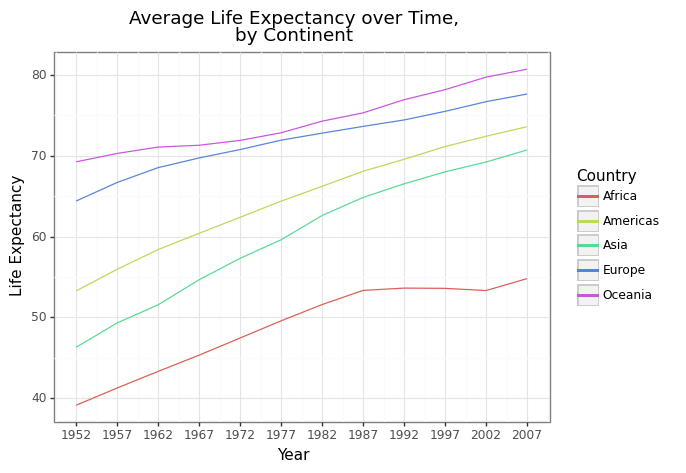

<ggplot: (156362267709)>

In [94]:
## plotting
import plotnine
from plotnine import *

(
    ggplot(
        data_viz, 
        aes(
            x='year', 
            y='lifeExp', 
            group='continent', 
            color='continent')) +
    geom_line() +
    labs(color = "Country") +
    xlab("Year") +
    ylab("Life Expectancy") +
    ggtitle("Average Life Expectancy over Time,\nby Continent") +
    scale_x_continuous(breaks=range(1952, 2007+1, 5)) +
    theme_bw()
)

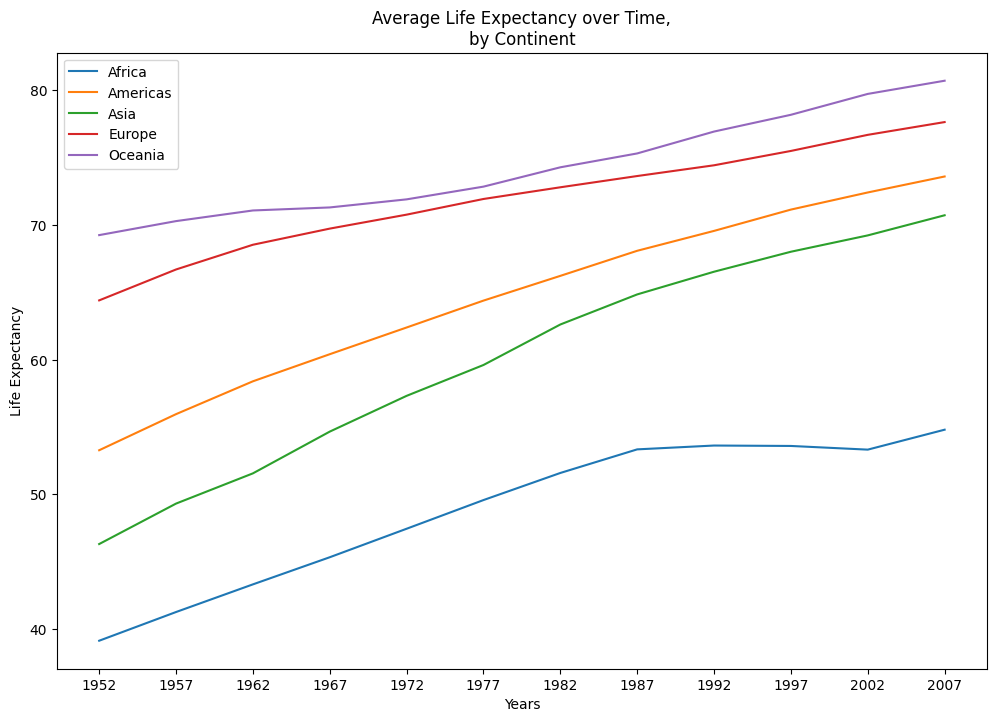

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8)) 

# lines
for i in data_viz['continent'].unique():
    plt.plot('year', 'lifeExp', data=data_viz[data_viz['continent'] == i], label=i)

# x-axis 
plt.xticks(range(1952, 2007+1, 5))    

# show legend
plt.legend()

# labels
plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.title("Average Life Expectancy over Time,\nby Continent")

plt.show()

## Data Visualization 

In [6]:
import missingno as msno

from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins

In [7]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<AxesSubplot:>

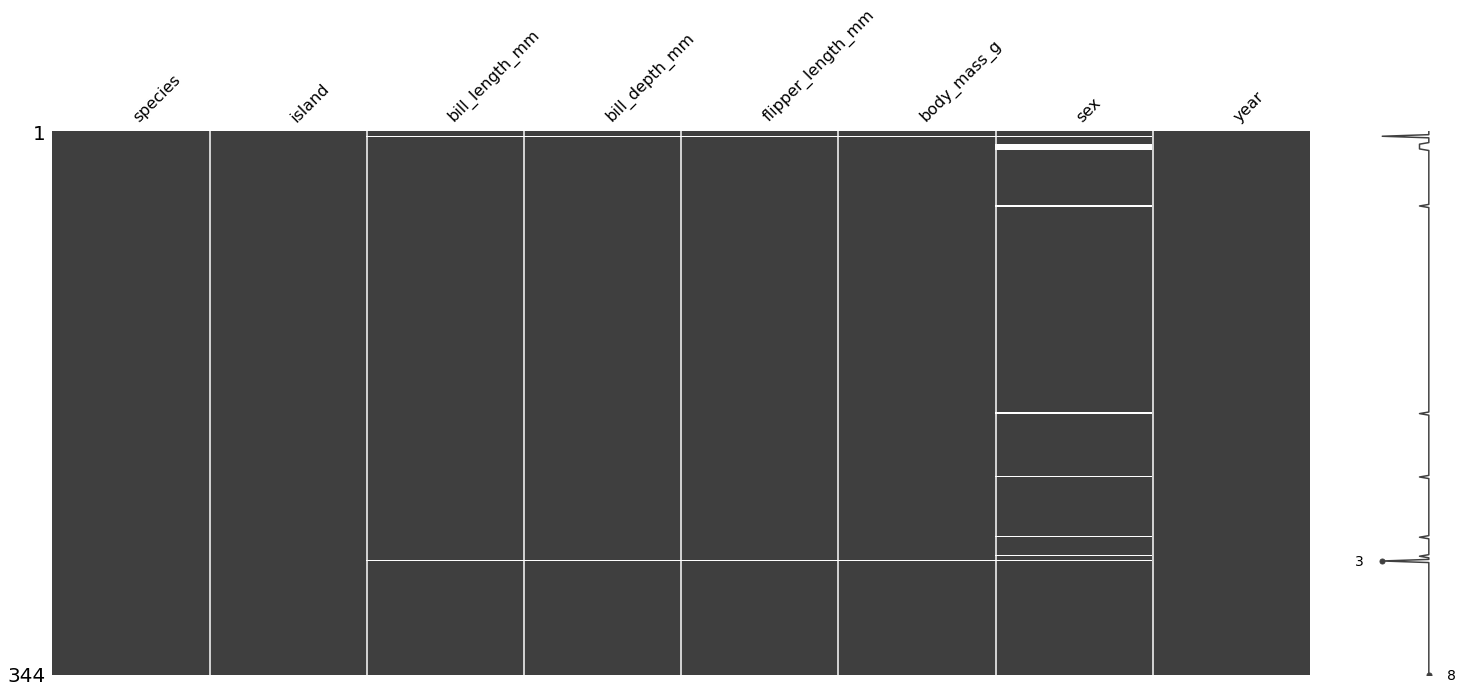

In [9]:
msno.matrix(penguins)

<AxesSubplot:>

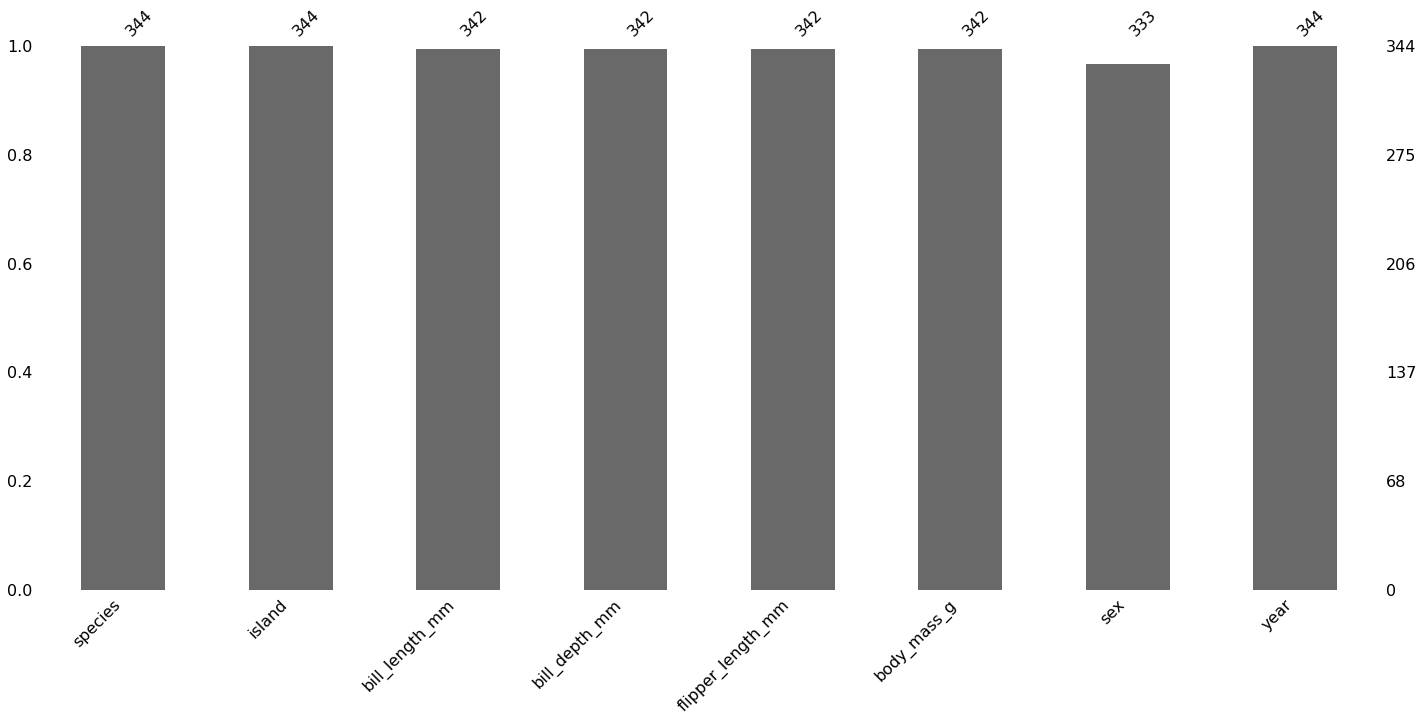

In [10]:
msno.bar(penguins)

Plot the body mass in grams (body_mass_g) as a boxplot. Make sure the following is true:

- body_mass_g is on the x-axis with a label that reads “Body Mass (Grams)”; and the y-axis is species and has no label.
- Add a title that reads “Penguin Body Mass”
- Each boxplot should be a different fill for each species but make sure there is no legend.

#### Plotnine solution

/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


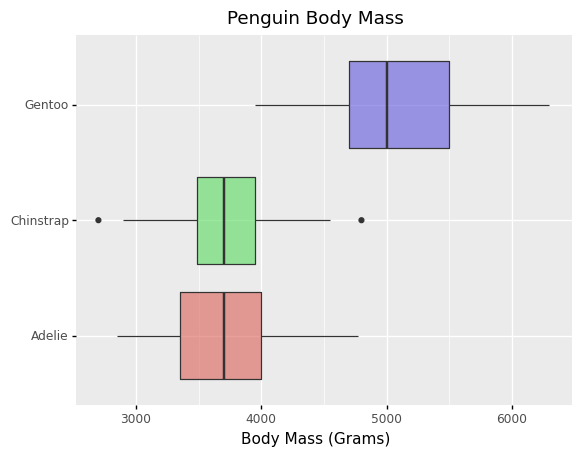

<ggplot: (8788768058973)>

In [23]:
p = \
(
ggplot(penguins,aes(x="species",y="body_mass_g",fill='species')) +
geom_boxplot(alpha=.6,show_legend=False) + # added some additional transparency
coord_flip() +
labs(x="", y = "Body Mass (Grams)",title="Penguin Body Mass")
)

p

In [ ]:
# show + theme_538, theme_xkcd, theme_void, theme_matplotlib

#### Seaborn solution

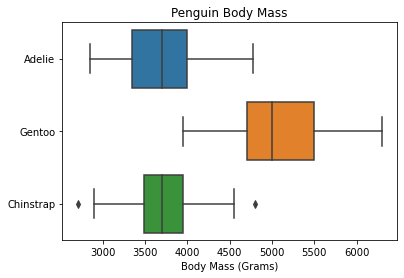

In [13]:
sns.boxplot(x="body_mass_g",y="species",data=penguins)
plt.xlabel("Body Mass (Grams)")
plt.ylabel("")
plt.title("Penguin Body Mass")
plt.show()

Text(0.5, 0, 'Body Mass (Grams)')

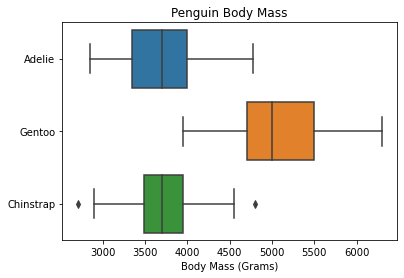

In [15]:
# You can also set titles using the seaborn object directly
ax = sns.boxplot(x="body_mass_g",y="species",data=penguins)
ax.set_title("Penguin Body Mass")
ax.set_ylabel("")
ax.set_xlabel("Body Mass (Grams)")


Using plotnine, generate a scatter plot where flipper length (flipper_length_mm) is on the x-axis and bill length (bill_length_mm) is on the y-axis. The points should be a different color given the species of the penguin. Also, the points should be sized differently given the body mass (body_mass_g) of the penguin.

In addition to the above:

points should be transparent (alpha=.5)
Labs should read: x-axis = “Flipper Length (MM)”, y-axis = “Bill Length (MM)”, color legend = “Penguin Species” and size legend = “Body Mass (Grams)”
The plot theme should be minimal.


/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


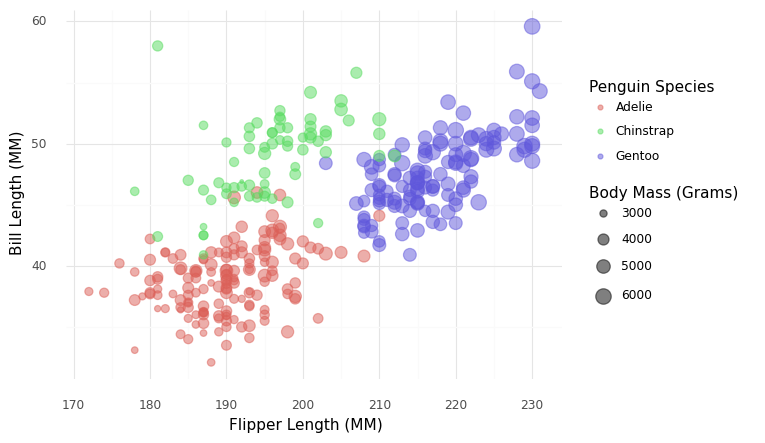

<ggplot: (8788764270357)>

In [29]:
(
    ggplot(penguins,aes(x="flipper_length_mm",
                   y="bill_length_mm",
                   color="species",
                   size="body_mass_g")) +
    geom_point(alpha=.5) +
    labs(x = "Flipper Length (MM)",y="Bill Length (MM)",
         color="Penguin Species",size = "Body Mass (Grams)") +
    theme_minimal() 
)

Using plotnine, generate barplot that contains the Penguin species on the x-axis and a count of the number of observations for each category on the y-axis. You’ll need to drop all missing observations first.



In [30]:
penguins.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


From there, do the following:

- Use the fill to break up each species by sex so that two bar plots are side-by-side (hint: position = "dodge").
- Alter the order so that the “Adelie” species is first, the “Gentoo” second, and the “Chinstrap” third.
- Change the fill colors so that “female” is “darkorange” and “male” is “black”
- x-axis label should read “Penguin Species”; the y-axis “Number of Observations”, and the legend should have no title.
- Add a title that reads “Distribution of Sex by Species”.
- The theme should be black and white (_bw).

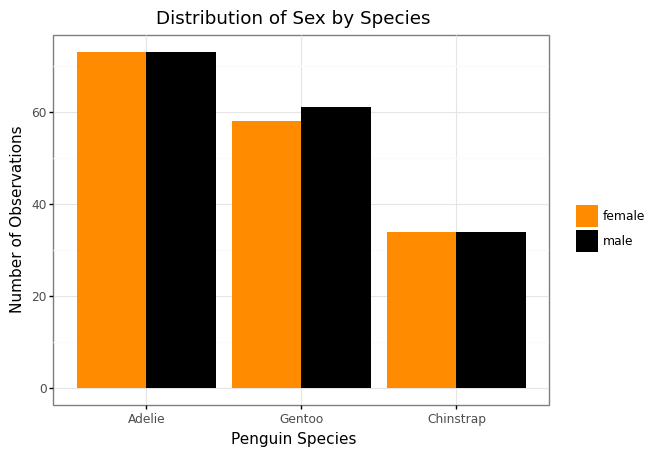

<ggplot: (8788764439641)>

In [31]:
(
    ggplot(penguins.dropna(),aes(x="species",fill="sex")) +
    geom_bar(position="dodge") +
    scale_x_discrete(limits = ["Adelie","Gentoo","Chinstrap"]) +
    scale_fill_manual(values=["darkorange","black"]) +
    labs(x="Penguin Species",y="Number of Observations", fill="",
         title = "Distribution of Sex by Species") +
    theme_bw()
)

## scratch

#### Q2. What’s the average `gdpPercap` in the `Americas` prior to `1980`?

In [ ]:
gm[(gm['continent'] == 'Americas') & (gm['year'] < 1980)]['gdpPercap'].mean().round(2)

In [ ]:
gm[(gm['continent'] == 'Americas') & (gm['year'] < 1980)].gdpPercap.mean().round(2)

In [ ]:
gm.query('continent == "Americas" and year < 1980')['gdpPercap'].mean().round(2)

In [ ]:
gm.query('continent == "Americas" and year < 1980').gdpPercap.mean().round(2)